# 随机森林

### 导入包

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 导入自己写的工具类
from my_tools import *
# 忽略warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

In [3]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3,random_state=42)
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(Xtrain,Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"raw-随机森林")

#####################raw-随机森林#####################
+--------------------+--------+-----+
|     precision      | recall |  f1 |
+--------------------+--------+-----+
| 0.7727122477383438 |  0.0   | 0.0 |
+--------------------+--------+-----+


### 数据处理：分箱
#### 分箱有助于让随机森林中的决策树基分类器更好地学习

In [4]:
best_method = "s"
best_num = -1
best_score = 0
for method in ["uniform","quantile","kmeans"]:
    for num in np.linspace(3,100,10,dtype = int):
        jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
        jibing = pd.read_excel("./jibing_feature_final.xlsx")
        col = jibing.columns.tolist()
        col = col[10:59]
        col.append("年龄")
        est = KBinsDiscretizer(n_bins=num, encode='ordinal', strategy=method)
        est.fit(jibing[col])
        jibing[col] = est.transform(jibing[col])
        
        sampler = SMOTE(sampling_strategy=1, random_state=42)
#         sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
        Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3,random_state=42)
        Xtrain, Ytrain = sampler.fit_resample(Xtrain,Ytrain)
        
        clf = RandomForestClassifier(random_state=42)
        clf.fit(Xtrain,Ytrain)
        y_pre = clf.predict(Xtest)
        
        metrics_ = res_metrics(Ytest,y_pre,"调参")
        if metrics_["f1-score"] > best_score:
            best_num = num
            best_method = method
            best_score = metrics_["f1-score"]

In [6]:
print("best_score={}\nbest_num={}\nbest_method={}".format(best_score,best_num,best_method))

best_score=0.1562746791929827
best_num=24
best_method=quantile


### 分箱使得 f1-score 稍微提升很多

In [7]:
col = jibing.columns.tolist()
col = col[10:59]
col.append("年龄")
est = KBinsDiscretizer(n_bins=24, encode='ordinal', strategy="quantile")
est.fit(jibing[col])
jibing[col] = est.transform(jibing[col])

sampler = SMOTE(sampling_strategy=1, random_state=42)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3,random_state=42)
Xtrain, Ytrain = sampler.fit_resample(Xtrain,Ytrain)

# sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
# jibing, jibing_res = sampler.fit_resample(jibing,jibing_res)
# Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.2)
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(Xtrain,Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"分箱后的随机森林")

#####################分箱后的随机森林#####################
+--------------------+---------------------+---------------------+
|     precision      |        recall       |          f1         |
+--------------------+---------------------+---------------------+
| 0.8299501424501424 | 0.08620689655172414 | 0.15619031023597776 |
+--------------------+---------------------+---------------------+


### 特征筛选

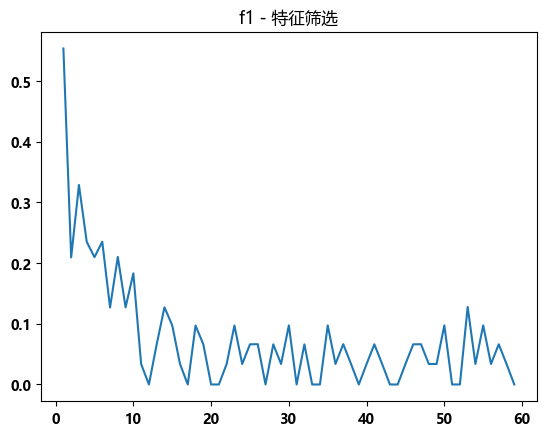

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
f1_list = []
best_k = -1
best_score = -1
set_font()
for i in range(1,60):
#     sampler = RandomOverSampler(sampling_strategy=0.2, random_state=42)
    smote = SMOTE(sampling_strategy=1, random_state=42)
    selector = SelectKBest(mutual_info_classif, k=i)
    jibing_ = selector.fit_transform(jibing, jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
#     Xtrain, Ytrain = sampler.fit_resample(Xtrain,Ytrain)
    Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
    if best_score < metrics_["f1-score"]:
        best_k = i
        best_score = metrics_["f1-score"]
zhexiantu(range(1,60),f1_list,"f1 - 特征筛选")

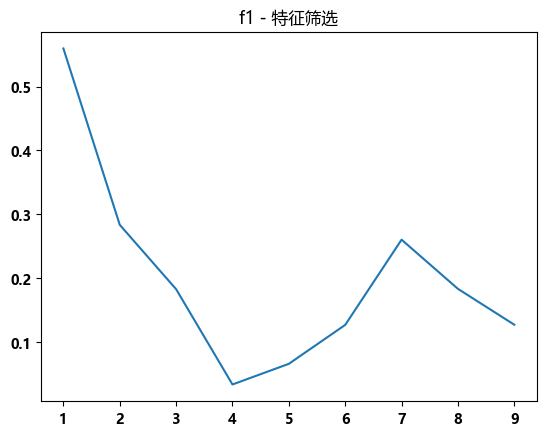

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
f1_list = []
best_k = -1
best_score = -1
set_font()
for i in range(1,10):
#     sampler = RandomOverSampler(sampling_strategy=0.2, random_state=42)
    smote = SMOTE(sampling_strategy=1, random_state=42)
    selector = SelectKBest(mutual_info_classif, k=i)
    jibing_ = selector.fit_transform(jibing, jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
#     Xtrain, Ytrain = sampler.fit_resample(Xtrain,Ytrain)
    Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
    if best_score < metrics_["f1-score"]:
        best_k = i
        best_score = metrics_["f1-score"]
zhexiantu(range(1,10),f1_list,"f1 - 特征筛选")

### 选择k=7，选择 1 不合理，且7可以继续降维有更多提升空间

In [18]:
smote = SMOTE(sampling_strategy=1, random_state=42)
selector = SelectKBest(mutual_info_classif, k=7)
jibing_ = selector.fit_transform(jibing, jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
clf = RandomForestClassifier(random_state=42)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"特征筛选-f1")

#####################特征筛选-f1######################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8125106487397448 | 0.1724137931034483 | 0.2844645476032686 |
+--------------------+--------------------+--------------------+


### PCA

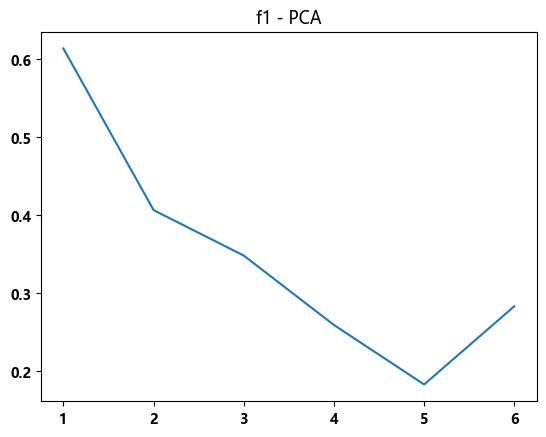

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
f1_list = []
for i in range(1,7):
    clf = RandomForestClassifier(random_state=42)
    pca = PCA(n_components=i,random_state=42)
    Xtrain_ = pca.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = pca.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,7),f1_list,"f1 - PCA")

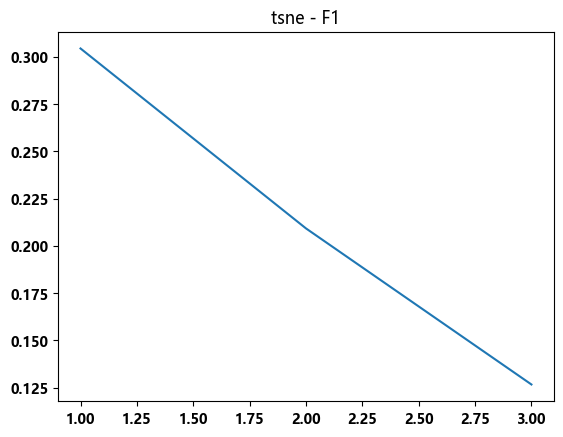

In [23]:
f1_list = []
for i in range(1,4):
    clf = RandomForestClassifier(random_state=42)
    tsne = TSNE(n_components=i,random_state=42)
    Xtrain_ = tsne.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = tsne.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,4),f1_list,"tsne - F1")

### 最终确定使用 PCA

In [25]:
clf = RandomForestClassifier(random_state=42)
pca = PCA(n_components=1,random_state=42)
Xtrain_ = pca.fit_transform(Xtrain,Ytrain)
clf.fit(Xtrain_, Ytrain)
Xtest_ = pca.fit_transform(Xtest)
y_pre = clf.predict(Xtest_)
metrics_ = res_metrics(Ytest,y_pre,"PCA_1 - f1")

####################PCA_1 - f1####################
+--------------------+--------+--------------------+
|     precision      | recall |         f1         |
+--------------------+--------+--------------------+
| 0.7956748413626238 |  0.5   | 0.6141007110440113 |
+--------------------+--------+--------------------+


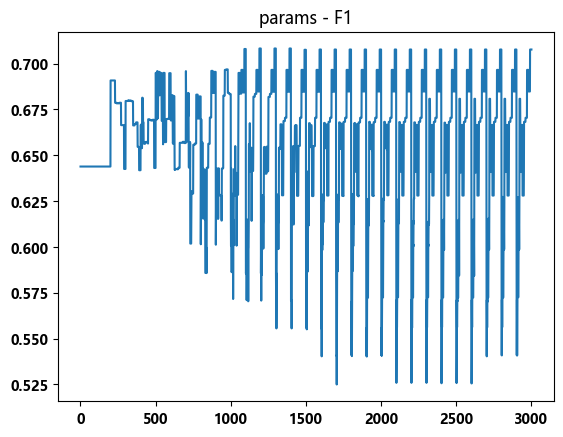

In [35]:
# 搜索最佳参数
f1_list = []
best_f1 = -1.1
best_max_d = -1
best_min_sl = -1
best_min_ss = -1
for max_d in np.linspace(1,30,30,dtype=int):
    for min_sl in np.linspace(1,20,10,dtype=int):
        for min_ss in np.linspace(2,20,10,dtype=int):
            clf = RandomForestClassifier(max_depth=max_d,min_samples_leaf=min_sl,min_samples_split=min_ss,random_state=42)
            clf.fit(Xtrain_, Ytrain)
            y_pre = clf.predict(Xtest_)
            metrics_ = res_metrics(Ytest,y_pre,"调参")
            if best_f1 < metrics_["f1-score"]:
                best_max_d = max_d
                best_min_sl = min_sl
                best_min_ss = min_ss
                best_f1 = metrics_["f1-score"]
            f1_list.append(metrics_["f1-score"])
zhexiantu(np.linspace(1,3000,3000),f1_list,"params - F1")

In [36]:
print("best_f1:{}\nmax_depth:{}\nmin_samples_leaf:{}\nmin_samples_split:{}".format(best_f1,best_max_d,best_min_sl,best_min_ss))

best_f1:0.708241319534363
max_depth:12
min_samples_leaf:20
min_samples_split:2


In [38]:
clf = RandomForestClassifier(max_depth=12,min_samples_leaf=20,min_samples_split=4)
clf.fit(Xtrain_, Ytrain)
y_pre = clf.predict(Xtest_)
metrics_ = res_metrics(Ytest,y_pre,"RF-params")

#####################RF-final#####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8218803868990615 | 0.6206896551724138 | 0.7072552999989069 |
+--------------------+--------------------+--------------------+


### 调整 n_estimators，基分类器的个数

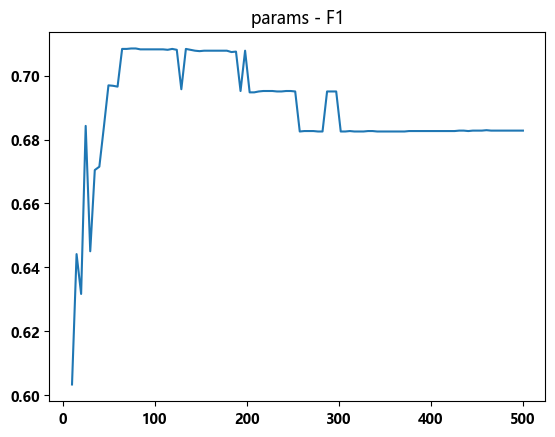

In [49]:
f1_list = []
best_f1 = -1.1
best_es = 0
for n_es in np.linspace(10,500,100,dtype=int):
    clf = RandomForestClassifier(n_estimators=n_es,max_depth=12,min_samples_leaf=20,min_samples_split=4,random_state=42)
    clf.fit(Xtrain_, Ytrain)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    if metrics_["f1-score"] > best_f1:
        best_f1 = metrics_["f1-score"]
        best_es = n_es
    f1_list.append(metrics_["f1-score"])
zhexiantu(np.linspace(10,500,100),f1_list,"params - F1")

In [50]:
best_es

74

In [51]:
clf = RandomForestClassifier(n_estimators=best_es,max_depth=12,min_samples_leaf=20,min_samples_split=4,random_state=42)
clf.fit(Xtrain_, Ytrain)
y_pre = clf.predict(Xtest_)
metrics_ = res_metrics(Ytest,y_pre,"RF-final")

#####################RF-final#####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8252976398907487 | 0.6206896551724138 | 0.7085175772530143 |
+--------------------+--------------------+--------------------+


### 随机森林最佳的 f1-score 为0.708